# Data-Driven ESG Optimization with Reinforcement Learning

This notebook implements a data-driven approach to ESG optimization using reinforcement learning. It demonstrates how to analyze ESG metrics, build an RL environment to model ESG initiatives, and train an agent to develop an optimal ESG strategy.

## Setup and Imports

Import the required libraries and set up our environment.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import os
import random
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check for CUDA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


## Data Loading

Load ESG dataset.

In [ ]:
data_file = '../energy_cleaned.csv' 

# Check if the file exists
if os.path.exists(data_file):
    # Load the data
    df = pd.read_csv(data_file)
    print(f"Dataset loaded successfully with shape: {df.shape}")
else:
    # Create a simple example dataset if the file doesn't exist
    print(f"Warning: {data_file} not found. Creating a simplified example dataset.")
    

Dataset loaded successfully with shape: (1224, 141)


## Explore the Dataset

Examine the dataset to understand its structure and content.

In [3]:
# Display dataset information
print("\nSample of the data:")
display(df.head())

# Check for unique companies in the dataset
companies = df['Company'].unique()
print(f"\nNumber of unique companies: {len(companies)}")
print(f"Companies: {companies}")


Sample of the data:


,Company,Ticker,Year,BESG ESG Score,BESG Environmental Pillar Score,BESG Social Pillar Score,BESG Governance Pillar Score,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,...,Indep Directors,Raw Materials Used,Percentage Gender Pay Gap Employees Ex Management,Percentage Raw Material from Sustainable Sources,"Revenue, Adj","Net Income, Adj",Margin %,"EPS, Adj",Market Cap ($M),Market Cap Category
0,ACS Actividades de Construccion y Servicios SA,ACS,2014,NaN,NaN,NaN,NaN,50.729,37.511,33.676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13716.9,Large Cap
1,ACS Actividades de Construccion y Servicios SA,ACS,2015,1.850,0.660,2.380,3.660,55.296,42.616,41.717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13716.9,Large Cap
2,ACS Actividades de Construccion y Servicios SA,ACS,2016,2.170,1.130,2.370,4.050,55.497,48.354,36.578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13716.9,Large Cap
3,ACS Actividades de Construccion y Servicios SA,ACS,2017,2.760,1.130,4.300,4.110,57.248,50.317,44.891,...,NaN,"5,140.650",NaN,NaN,NaN,NaN,NaN,NaN,13716.9,Large Cap
4,ACS Actividades de Construccion y Servicios SA,ACS,2018,2.630,1.110,4.200,3.640,62.609,52.280,59.039,...,NaN,"8,653.300",NaN,NaN,NaN,NaN,NaN,NaN,13716.9,Large Cap



Number of unique companies: 122
Companies: ['ACS Actividades de Construccion y Servicios SA' 'AKITA Drilling Ltd'
 'ARC Resources Ltd' 'Abu Dhabi National Energy Co PJSC'
 'Advantage Energy Ltd' 'Ampol Ltd' 'Arabian Drilling Co'
 'Athabasca Oil Corp' 'BASF SE' 'BLUENORD ASA' 'BP PLC'
 'Bangchak Corp PCL' 'Baytex Energy Corp' 'Birchcliff Energy Ltd'
 'Blackrock Inc' 'Braskem SA' 'Brookfield Corp' 'Buckeye Partners LP'
 'Bumi Armada Bhd' 'CNOOC Ltd' 'Canadian Natural Resources Ltd'
 'Cenovus Energy Inc' 'Chevron Corp' 'China National Petroleum Corp'
 'China Petroleum & Chemical Corp' 'Cia Brasileira de Aluminio'
 'ConocoPhillips' 'Contact Energy Ltd'
 'CorEnergy Infrastructure Trust Inc' 'Coterra Energy Inc'
 'Crescent Energy Co' 'ENEOS Holdings Inc' 'Ecopetrol SA' 'Enbridge Inc'
 'Energy Transfer LP' 'Eneva SA' 'Eni SpA' 'Equinor ASA'
 'Exxon Mobil Corp' 'Floene Energias SA' 'Fonterra Co-operative Group Ltd'
 'Galp Energia SGPS SA' 'General Mills Inc' 'Grupo Energia Bogota SA ESP'
 'HE

## Import ESG Reinforcement Learning Implementation

Import custom ESG RL module.

In [ ]:
# Import the ESG RL implementation
# Assuming you've saved the code as esg_data_driven.py
import sys
sys.path.append('.')  # Add the current directory to the path
try:
    from esg_rl_agent import ESGDataAnalyzer, DataDrivenESGEnvironment, DataDrivenDQNAgent, data_driven_training, visualize_esg_strategy
    print("Successfully imported the data-driven ESG RL implementation")
except ImportError:
    print("Warning: esg_data_driven.py not found. Please make sure it's in the current directory.")

# Create results directory
results_dir = './esg_results'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

Successfully imported the data-driven ESG RL implementation


## Data Analysis

Analyze the ESG data to understand industry benchmarks and effective actions.

In [5]:
# Cell to create a data analyzer and explore the dataset
analyzer = ESGDataAnalyzer(df)

# Get industry benchmarks
print("\nIndustry Benchmarks for ESG Score:")
for industry, benchmarks in analyzer.industry_benchmarks.items():
    if 'BESG ESG Score' in benchmarks:
        print(f"Industry: {industry}")
        for percentile, value in benchmarks['BESG ESG Score'].items():
            if percentile in ['p25', 'p50', 'p75', 'p90']:
                print(f"  {percentile}: {value:.2f}")

# Analyze effective actions
print("\nMost effective ESG actions based on historical data:")
for pillar, actions in analyzer.effective_actions.items():
    if actions:
        print(f"\n{pillar.capitalize()} pillar:")
        for i, action in enumerate(actions[:3]):  # Show top 3
            print(f"  {i+1}. {action['company']} improved by {action['improvement']:.2f} points")
            for metric, change in action['metrics'][:2]:  # Show top 2 metrics
                print(f"     • {metric}: {'+' if change > 0 else ''}{change:.2f}")


Industry Benchmarks for ESG Score:
Industry: Cluster_4
  p25: 2.60
  p50: 3.34
  p75: 4.11
  p90: 4.18
Industry: Cluster_0
  p25: 1.12
  p50: 1.36
  p75: 1.49
  p90: 1.57
Industry: Cluster_2
  p25: 4.72
  p50: 5.61
  p75: 6.20
  p90: 6.55
Industry: Cluster_1
  p25: 3.94
  p50: 4.11
  p75: 4.26
  p90: 5.03
Industry: Cluster_7
  p25: 2.80
  p50: 3.96
  p75: 4.11
  p90: 4.39
Industry: Cluster_5
  p25: 4.11
  p50: 4.52
  p75: 5.13
  p90: 5.59
Industry: Cluster_3
  p25: 1.60
  p50: 2.65
  p75: 4.11
  p90: 4.11
Industry: Cluster_6
  p25: 4.10
  p50: 4.11
  p75: 4.83
  p90: 5.29

Most effective ESG actions based on historical data:

Environmental pillar:
  1. National Energy Services Reunited Corp improved by 3.51 points
     • BESG Environmental Pillar Score: +3.45
  2. Parex Resources Inc improved by 3.51 points
     • BESG Environmental Pillar Score: +3.06
  3. Energy Transfer LP improved by 2.99 points
     • BESG Environmental Pillar Score: +3.45

Social pillar:
  1. National Energy Ser

## Environment Setup

Set up our reinforcement learning environment for ESG optimization.

In [6]:
# Cell to set up the environment
# Select a company index (change as needed)
company_idx = 0  # First company in the dataset
company_name = companies[company_idx]
print(f"\nSelected company: {company_name}")

# Create the environment with enhanced parameters
env = DataDrivenESGEnvironment(
    df, 
    company_idx=company_idx, 
    max_steps=5,  # Start with smaller steps for faster initial training
    scale_factor=0.1,  # For 0-10 scale
    diversity_weight=3.0,  # Strong emphasis on action diversity  
    balance_weight=2.5  # Strong emphasis on pillar balance
)

# Display available actions
print("\nAvailable actions:")
actions = env.get_available_actions()
for action_id, name, cost, pillar in actions:
    print(f"ID: {action_id}, Name: {name}, Cost: {cost}, Pillar: {pillar}")

# Display initial state
print("\nInitial state:")
env.render()

# Get data-driven insights for the company
insights = env.get_company_insights()
print("\nData-Driven ESG Insights:")
for insight in insights:
    print(f"- {insight}")


Selected company: ACS Actividades de Construccion y Servicios SA

Available actions:
ID: 0, Name: No Action, Cost: 0, Pillar: None
ID: 1, Name: Renewable Energy Investment, Cost: 90, Pillar: environmental
ID: 2, Name: Water Conservation Program, Cost: 70, Pillar: environmental
ID: 3, Name: Waste Reduction Initiative, Cost: 65, Pillar: environmental
ID: 4, Name: Energy Efficiency Upgrade, Cost: 80, Pillar: environmental
ID: 5, Name: Supply Chain Emissions Program, Cost: 85, Pillar: environmental
ID: 6, Name: Diversity & Inclusion Program, Cost: 50, Pillar: social
ID: 7, Name: Employee Wellbeing Initiative, Cost: 45, Pillar: social
ID: 8, Name: Community Engagement Project, Cost: 60, Pillar: social
ID: 9, Name: Worker Safety Program, Cost: 55, Pillar: social
ID: 10, Name: Workforce Development Training, Cost: 40, Pillar: social
ID: 11, Name: Board Independence Enhancement, Cost: 35, Pillar: governance
ID: 12, Name: Executive Compensation Reform, Cost: 30, Pillar: governance
ID: 13, Name

## Agent Training

Train reinforcement learning agent to optimize ESG strategy.

In [7]:
# Cell to train the agent
# You can adjust these parameters based on your needs
train_config = {
    'n_episodes': 200,  # Total training episodes
    'early_stop_threshold': 8.0,  # Early stopping if average reward exceeds this
    'checkpoint_dir': f'{results_dir}/checkpoints',
    'evaluate_every': 20,  # Evaluate agent every N episodes
    'curriculum_learning': True  # Use curriculum learning
}

# Option to skip training and load a pre-trained model
train_new_model = True  # Set to False to skip training

if train_new_model:
    print("Starting training...")
    scores, agent, pillar_improvements = data_driven_training(
        env,
        n_episodes=train_config['n_episodes'],
        early_stop_threshold=train_config['early_stop_threshold'],
        checkpoint_dir=train_config['checkpoint_dir'],
        evaluate_every=train_config['evaluate_every'],
        curriculum_learning=train_config['curriculum_learning']
    )

Starting training...
Episode 10	Average Score: -5.28	Epsilon: 1.000
Pillar Improvements - Env: 0.774, Social: 0.576, Gov: 0.469
Episode 20	Average Score: -6.03	Epsilon: 1.000
Pillar Improvements - Env: 0.774, Social: 0.504, Gov: 0.580

Evaluation at episode 20: Avg Score: 3.31
Eval Pillar Balance - Env: 2.340, Social: 4.920, Gov: 3.640
New best model saved with eval score: 3.31
Episode 30	Average Score: -6.01	Epsilon: 0.970
Pillar Improvements - Env: 0.941, Social: 1.007, Gov: 0.580
Episode 40	Average Score: -3.89	Epsilon: 0.932
Pillar Improvements - Env: 1.448, Social: 0.792, Gov: 0.386

Evaluation at episode 40: Avg Score: 14.77
Eval Pillar Balance - Env: 3.064, Social: 4.200, Gov: 3.640
New best model saved with eval score: 14.77
Episode 50	Average Score: -3.53	Epsilon: 0.900
Pillar Improvements - Env: 1.136, Social: 0.792, Gov: 0.242
Episode 60	Average Score: -4.62	Epsilon: 0.865
Pillar Improvements - Env: 0.774, Social: 1.130, Gov: 0.290

Evaluation at episode 60: Avg Score: 6.04


## Visualize Training Results

Visualize the training progress and results.

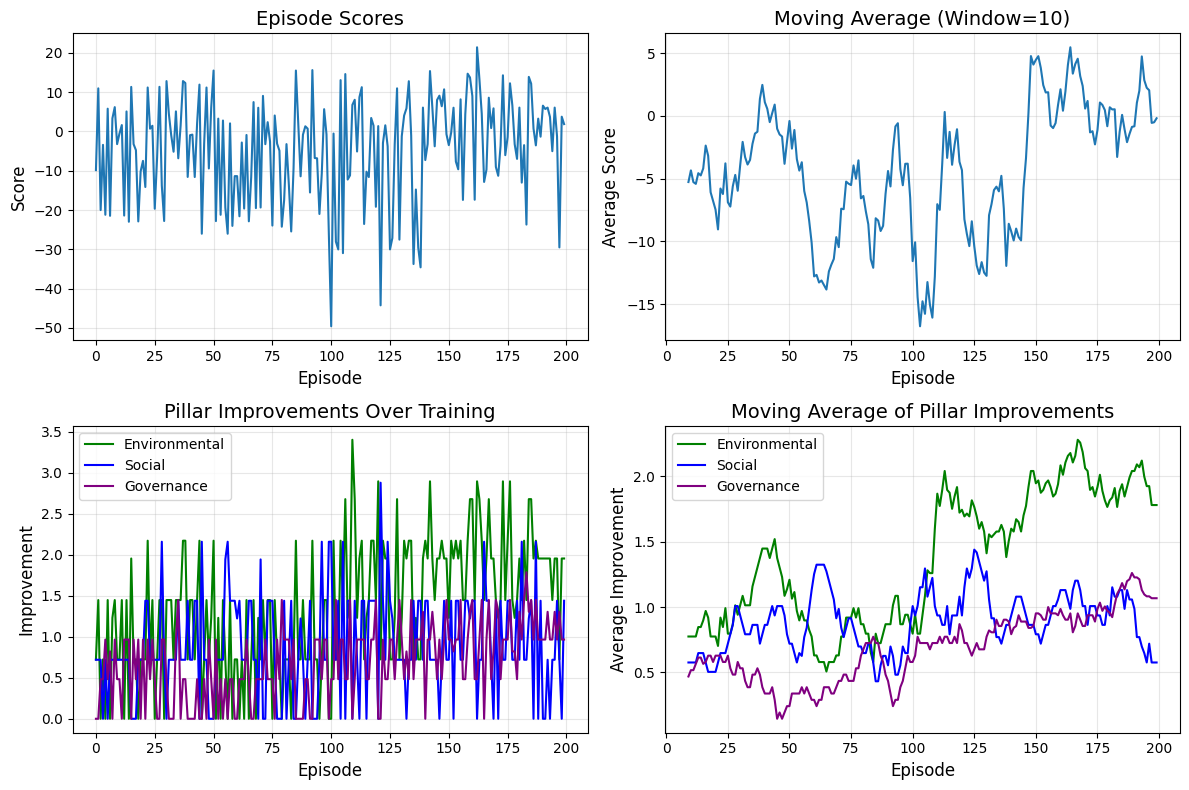

In [8]:
# Plot training results (only executes if a new model was trained)
if train_new_model:
    plt.figure(figsize=(12, 8))
    
    # Plot episode scores
    plt.subplot(2, 2, 1)
    plt.plot(scores)
    plt.title('Episode Scores', fontsize=14)
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Plot moving average
    window_size = 10
    moving_avg = pd.Series(scores).rolling(window_size).mean()
    plt.subplot(2, 2, 2)
    plt.plot(moving_avg)
    plt.title(f'Moving Average (Window={window_size})', fontsize=14)
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Average Score', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Plot pillar improvements
    env_improvements, social_improvements, gov_improvements = pillar_improvements
    plt.subplot(2, 2, 3)
    plt.plot(env_improvements, 'g-', label='Environmental')
    plt.plot(social_improvements, 'b-', label='Social')
    plt.plot(gov_improvements, 'purple', label='Governance')
    plt.title('Pillar Improvements Over Training', fontsize=14)
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Improvement', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add pillar balance over time
    env_avg = pd.Series(env_improvements).rolling(window_size).mean()
    social_avg = pd.Series(social_improvements).rolling(window_size).mean()
    gov_avg = pd.Series(gov_improvements).rolling(window_size).mean()
    plt.subplot(2, 2, 4)
    plt.plot(env_avg, 'g-', label='Environmental')
    plt.plot(social_avg, 'b-', label='Social')
    plt.plot(gov_avg, 'purple', label='Governance')
    plt.title('Moving Average of Pillar Improvements', fontsize=14)
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Average Improvement', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{results_dir}/training_progress.png')
    plt.show()
else:
    # Load the agent from the best checkpoint
    best_model_path = f'{train_config["checkpoint_dir"]}/best_model.pth'
    if os.path.exists(best_model_path):
        print(f"Loading pre-trained model from {best_model_path}")
        agent = DataDrivenDQNAgent(state_size=len(env.reset()), action_size=env.action_space.n)
        agent.load(best_model_path)
    else:
        print("Error: No pre-trained model found. Please train a model first.")

## Evaluate and Visualize the ESG Strategy

Evaluate our trained agent and visualize the optimized ESG strategy.


Evaluating and visualizing the optimized ESG strategy...

Testing Episode 1
Initial state:
Step: 0, Company: ACS Actividades de Construccion y Servicios SA, Year: 2018
BESG ESG Score: 2.63
BESG Environmental Pillar Score: 1.11
BESG Social Pillar Score: 4.20
BESG Governance Pillar Score: 3.64
Renewable Energy Use: 23.77
Revenue, Adj: 0.00
Net Income, Adj: 0.00
Market Cap ($M): 13716.90
Pillar Balance - Env: 1.11, Social: 4.20, Gov: 3.64
Pillar Imbalance Score: 1.34
ESG Score Benchmark: BELOW AVERAGE

Company ESG Insights:
- Overall ESG Score: 4.11 (out of 10)
- ESG performance is ABOVE AVERAGE compared to industry peers.
- Strongest pillar: Governance (6.28)
- Weakest pillar: Social (3.43)
- ✅ Environmental performance is in the TOP 25% of industry peers.
...

Step 1: Action = Supply Chain Emissions Program (Pillar: environmental)
Reward = 6.20, ESG Score Change: 0.74
Step: 1, Company: ACS Actividades de Construccion y Servicios SA, Year: 2019
BESG ESG Score: 3.37
BESG Environmental Pi

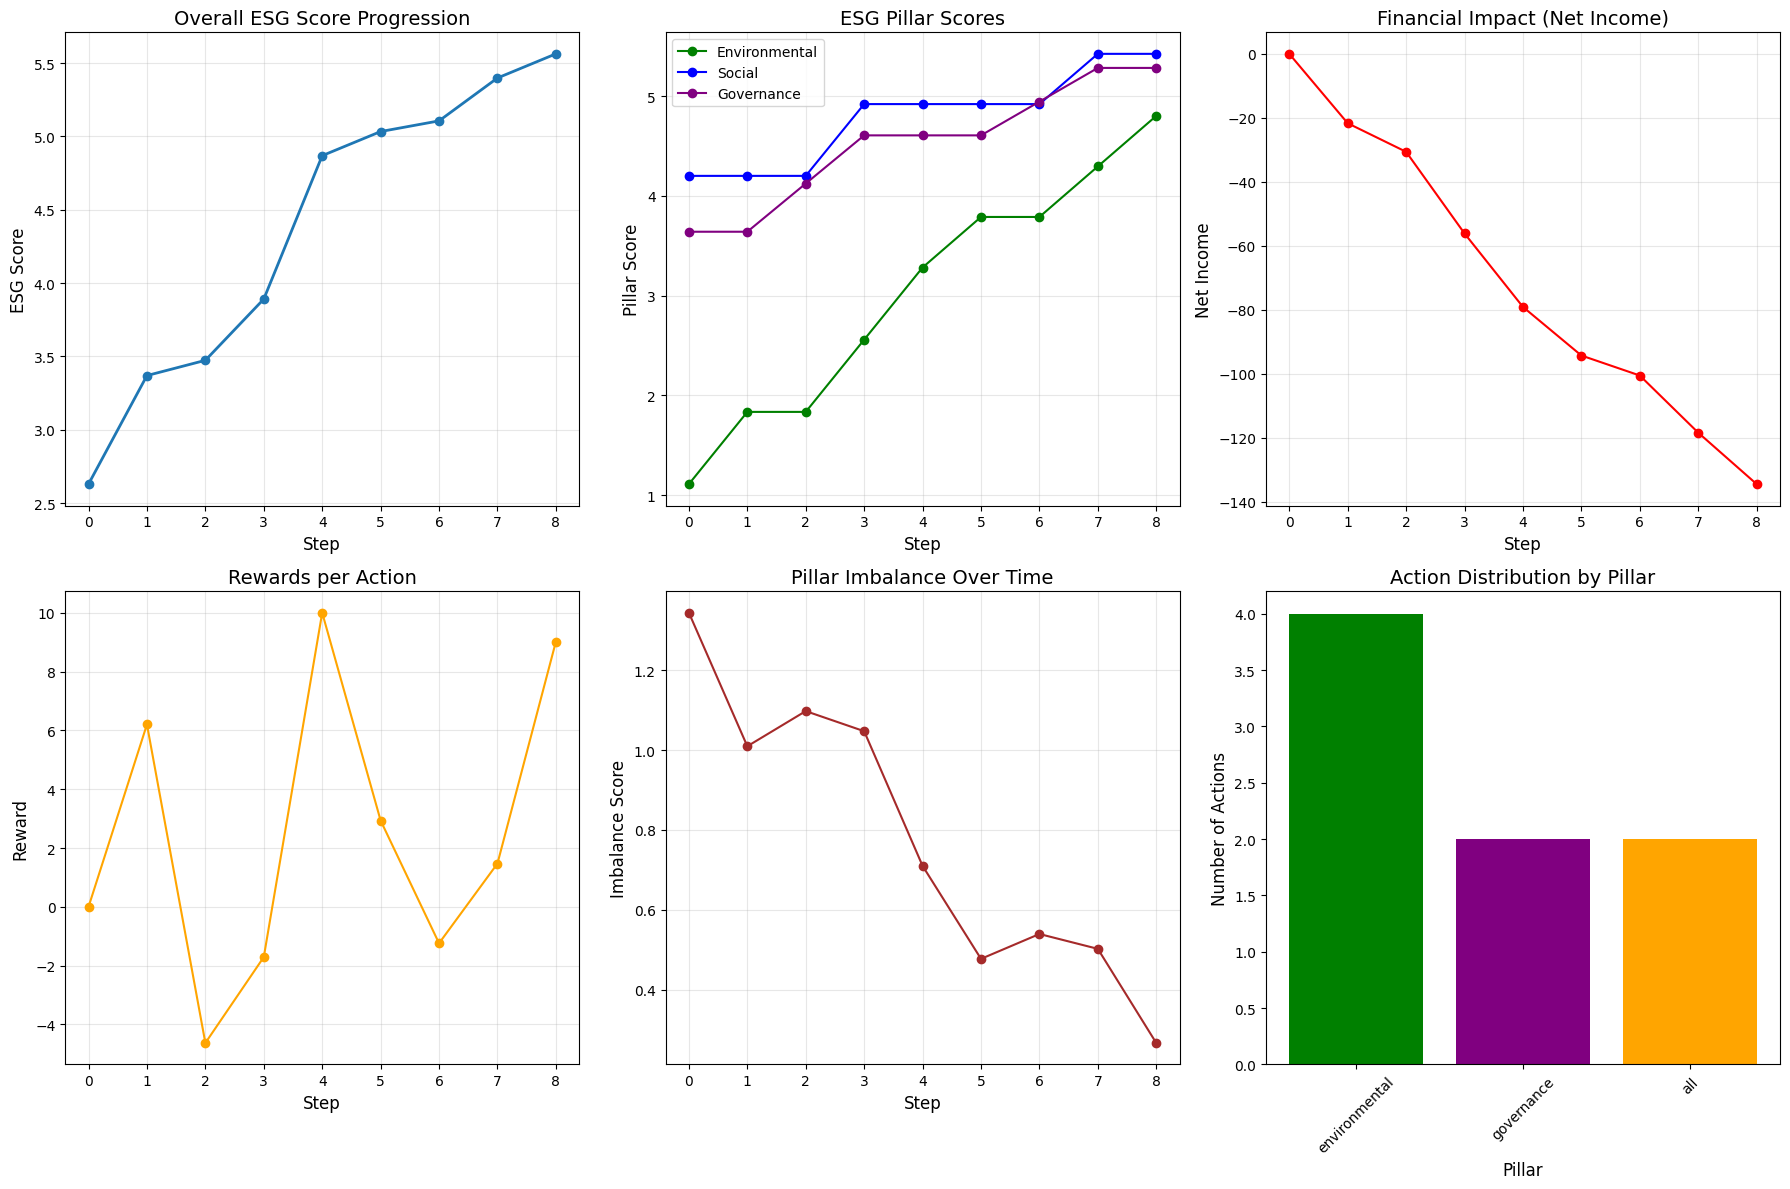

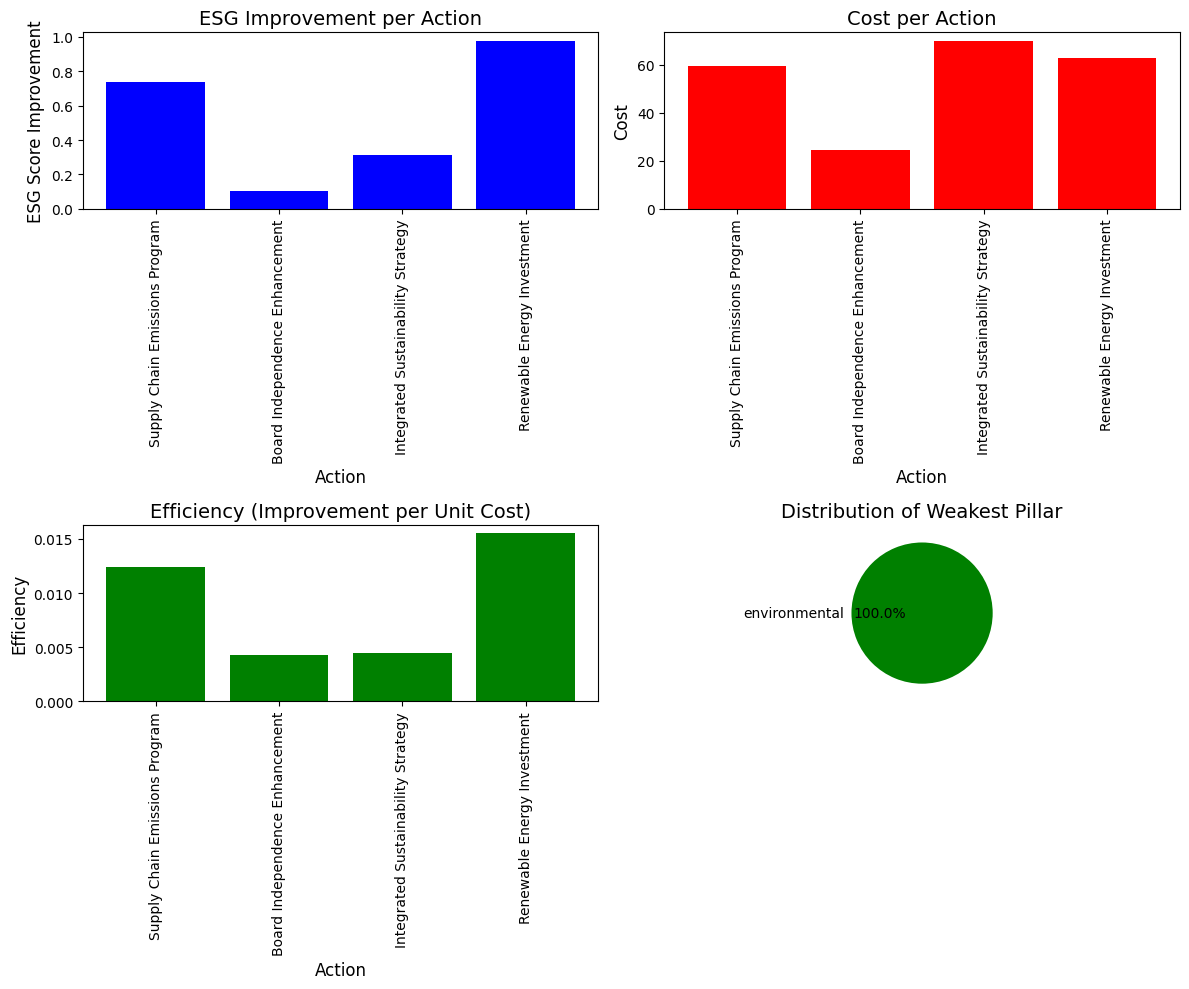


Actions Taken:
   Step                              Action         Pillar  ESG Score  \
0     0                       Initial State           None   2.630000   
1     1      Supply Chain Emissions Program  environmental   3.369942   
2     2      Board Independence Enhancement     governance   3.473911   
3     3  Integrated Sustainability Strategy            all   3.891564   
4     4         Renewable Energy Investment  environmental   4.869219   
5     5      Supply Chain Emissions Program  environmental   5.033719   
6     6      Board Independence Enhancement     governance   5.106498   
7     7  Integrated Sustainability Strategy            all   5.398855   
8     8         Renewable Energy Investment  environmental   5.563471   

   Env Score  Social Score  Gov Score     Reward  
0    1.11000       4.20000     3.6400   0.000000  
1    1.83380       4.20000     3.6400   6.201138  
2    1.83380       4.20000     4.1230  -4.628368  
3    2.55760       4.91960     4.6060  -1.707898 

In [9]:
# Cell to evaluate and visualize the optimized ESG strategy
print("\nEvaluating and visualizing the optimized ESG strategy...")

# Create a fresh environment for evaluation
eval_env = DataDrivenESGEnvironment(
    df, 
    company_idx=company_idx,
    max_steps=8,  # Use more steps for evaluation to see longer-term strategy
    scale_factor=0.1,
    diversity_weight=3.0,
    balance_weight=2.5
)

# Run visualization
visualization_results = visualize_esg_strategy(
    eval_env, 
    agent,
    num_episodes=1,  # Number of episodes to visualize
    save_dir=f'{results_dir}/visualizations'
)

## Strategic Report Generation

Generate a strategic report based on the optimization results.

In [11]:
# Create a strategic report based on the results
if visualization_results:
    # Extract the first episode results
    episode_data = visualization_results[0]
    results_df = pd.DataFrame(episode_data)
    
    # Calculate key metrics
    initial_esg = results_df.loc[0, 'esg_score']
    final_esg = results_df.loc[results_df['step'].max(), 'esg_score']
    improvement = final_esg - initial_esg
    
    initial_env = results_df.loc[0, 'env_score']
    final_env = results_df.loc[results_df['step'].max(), 'env_score']
    env_improvement = final_env - initial_env
    
    initial_social = results_df.loc[0, 'social_score']
    final_social = results_df.loc[results_df['step'].max(), 'social_score']
    social_improvement = final_social - initial_social
    
    initial_gov = results_df.loc[0, 'gov_score']
    final_gov = results_df.loc[results_df['step'].max(), 'gov_score']
    gov_improvement = final_gov - initial_gov
    
    initial_income = results_df.loc[0, 'net_income']
    final_income = results_df.loc[results_df['step'].max(), 'net_income']
    financial_impact = final_income - initial_income
    
    # Summary
    print("\n======= ESG OPTIMIZATION STRATEGIC REPORT =======")
    print(f"Company: {company_name}")
    print(f"\nOverall ESG Score Improvement: {improvement:.2f} points ({initial_esg:.2f} → {final_esg:.2f})")
    print(f"Environmental Pillar: {env_improvement:.2f} points ({initial_env:.2f} → {final_env:.2f})")
    print(f"Social Pillar: {social_improvement:.2f} points ({initial_social:.2f} → {final_social:.2f})")
    print(f"Governance Pillar: {gov_improvement:.2f} points ({initial_gov:.2f} → {final_gov:.2f})")
    
    if financial_impact < 0:
        print(f"\nFinancial Investment: ${abs(financial_impact):.2f}")
        print(f"Return on ESG Investment: {improvement / abs(financial_impact):.4f} ESG points per dollar")
    else:
        print(f"\nFinancial Impact: POSITIVE ${financial_impact:.2f}")
    
    # Strategic recommendations
    print("\nStrategic Action Plan:")
    
    # Get actions taken
    actions_taken = results_df.loc[results_df['step'] > 0, ['step', 'action', 'pillar', 'improvement', 'cost']]
    
    for _, row in actions_taken.iterrows():
        print(f"{row['step']}. {row['action']} (Pillar: {row['pillar']}) - Improvement: {row['improvement']:.3f}, Cost: {row['cost']:.2f}")
    
    # Final pillar balance assessment
    final_imbalance = results_df.loc[results_df['step'].max(), 'pillar_imbalance']
    if final_imbalance < 0.2:
        balance_assessment = "WELL BALANCED"
    elif final_imbalance < 0.5:
        balance_assessment = "MODERATELY BALANCED"
    else:
        balance_assessment = "IMBALANCED"
    
    print(f"\nFinal Pillar Balance Assessment: {balance_assessment} (Imbalance Score: {final_imbalance:.3f})")
    
    # Get action recommendations for further improvement
    print("\nRecommendations for Further Improvement:")
    
    # Identify weakest pillar at the end
    final_pillar_scores = {
        'environmental': final_env,
        'social': final_social,
        'governance': final_gov
    }
    
    weakest_pillar = min(final_pillar_scores.items(), key=lambda x: x[1])[0]
    
    print(f"Focus on {weakest_pillar.upper()} pillar for next phase of improvement")
    
    # Get unused actions for the weakest pillar
    unused_actions = []
    used_action_names = actions_taken['action'].unique()
    
    for action_id, name, cost, pillar in actions:
        if name not in used_action_names and pillar == weakest_pillar:
            unused_actions.append((name, cost))
    
    if unused_actions:
        print("Consider these unused actions:")
        for name, cost in unused_actions:
            print(f"- {name} (Cost: {cost})")
    
    # Get similar companies for benchmarking
    similar_companies = eval_env.get_similar_companies()
    if similar_companies:
        print("\nBenchmark against these similar companies:")
        for company in similar_companies[:3]:
            company_data = df[df['Company'] == company]
            if len(company_data) > 0:
                latest_data = company_data.sort_values('Year', ascending=False).iloc[0]
                if 'BESG ESG Score' in latest_data:
                    print(f"- {company} (ESG Score: {latest_data['BESG ESG Score']:.2f})")
                else:
                    print(f"- {company}")
    
    # Save the strategic report
    report_path = f'{results_dir}/strategic_report.txt'
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write(f"ESG OPTIMIZATION STRATEGIC REPORT\n")
        f.write(f"Company: {company_name}\n\n")
        f.write(f"Overall ESG Score Improvement: {improvement:.2f} points ({initial_esg:.2f} → {final_esg:.2f})\n")
        f.write(f"Environmental Pillar: {env_improvement:.2f} points ({initial_env:.2f} → {final_env:.2f})\n")
        f.write(f"Social Pillar: {social_improvement:.2f} points ({initial_social:.2f} → {final_social:.2f})\n")
        f.write(f"Governance Pillar: {gov_improvement:.2f} points ({initial_gov:.2f} → {final_gov:.2f})\n\n")
        
        if financial_impact < 0:
            f.write(f"Financial Investment: ${abs(financial_impact):.2f}\n")
            f.write(f"Return on ESG Investment: {improvement / abs(financial_impact):.4f} ESG points per dollar\n\n")
        else:
            f.write(f"Financial Impact: POSITIVE ${financial_impact:.2f}\n\n")
        
        f.write("Strategic Action Plan:\n")
        for _, row in actions_taken.iterrows():
            f.write(f"{row['step']}. {row['action']} (Pillar: {row['pillar']}) - Improvement: {row['improvement']:.3f}, Cost: {row['cost']:.2f}\n")
        
        f.write(f"\nFinal Pillar Balance Assessment: {balance_assessment} (Imbalance Score: {final_imbalance:.3f})\n\n")
        
        f.write("Recommendations for Further Improvement:\n")
        f.write(f"Focus on {weakest_pillar.upper()} pillar for next phase of improvement\n")
        
        if unused_actions:
            f.write("Consider these unused actions:\n")
            for name, cost in unused_actions:
                f.write(f"- {name} (Cost: {cost})\n")
    
    print(f"\nStrategic report saved to {report_path}")


======= ESG OPTIMIZATION STRATEGIC REPORT =======
Company: ACS Actividades de Construccion y Servicios SA

Overall ESG Score Improvement: 2.93 points (2.63 → 5.56)
Environmental Pillar: 3.69 points (1.11 → 4.80)
Social Pillar: 1.22 points (4.20 → 5.42)
Governance Pillar: 1.64 points (3.64 → 5.28)

Financial Investment: $134.47
Return on ESG Investment: 0.0218 ESG points per dollar

Strategic Action Plan:
1. Supply Chain Emissions Program (Pillar: environmental) - Improvement: 0.740, Cost: 59.50
2. Board Independence Enhancement (Pillar: governance) - Improvement: 0.104, Cost: 24.50
3. Integrated Sustainability Strategy (Pillar: all) - Improvement: 0.313, Cost: 70.00
4. Renewable Energy Investment (Pillar: environmental) - Improvement: 0.978, Cost: 63.00
5. Supply Chain Emissions Program (Pillar: environmental) - Improvement: 0.164, Cost: 41.65
6. Board Independence Enhancement (Pillar: governance) - Improvement: 0.073, Cost: 17.15
7. Integrated Sustainability Strategy (Pillar: all) - 